In [2]:
# extracting tesla stock data using yfinance 
# First install the library (only need to do this once)
!pip install yfinance

# Then import
import yfinance as yf
import pandas as pd

# Now you can use yfinance
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 78.4 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 106.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 181.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 181.3 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-cp312-cp312-linux_x86_64.whl size=303801 sha256=c7e6206a4e201f562715317f8a4cc2ca33d0792980aee6ddd14dfdb1048a91b6
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/1a/57/6a/bb71346381d0d911cd4ce3026f1fa720da76707e4f01cf27dd
Successfully built peewee


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [8]:
#Extracting Tesla Revenue Data 
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {'User-Agent': 'Mozilla/5.0'}  # Some sites block default requests
html_data = requests.get(url, headers=headers).text
soup = BeautifulSoup(html_data, 'html.parser')

# Find all tables and identify the correct one
tables = soup.find_all('table')
for i, table in enumerate(tables):
    if "Quarterly Revenue" in str(table):  # Look for table with this text
        revenue_table = table
        break
else:
    revenue_table = tables[0]  # Fallback to first table if not found

# Extract data
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in revenue_table.find('tbody').find_all('tr'):
    cols = row.find_all('td')
    if len(cols) >= 2:  # Ensure we have both date and revenue columns
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace('$', '').replace(',', '')
        if revenue:  # Only add rows with revenue data
            tesla_revenue = pd.concat([
                tesla_revenue,
                pd.DataFrame({"Date": [date], "Revenue": [revenue]})
            ], ignore_index=True)

tesla_revenue.tail()

,Date,Revenue
58,2010-09-30,31
59,2010-06-30,28
60,2010-03-31,21
61,2009-09-30,46
62,2009-06-30,27


In [10]:
#Extracting GameStop Stock Data Using yfinance
# Create ticker object for GameStop
gme = yf.Ticker("GME")

# Extract stock data with max period
gme_data = gme.history(period="max")

# Reset index and display first 5 rows
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


In [13]:
#Extracting GameStop Revenue Data Using Webscraping

import requests
from bs4 import BeautifulSoup
import pandas as pd

# First install required packages (run this once)
!pip install --upgrade html5lib lxml beautifulsoup4

# Set user agent to prevent blocking
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Try with different parsers
try:
    # First try lxml (fastest)
    html_data = requests.get(url, headers=headers).text
    soup = BeautifulSoup(html_data, 'lxml')
    print("Using lxml parser")
except:
    try:
        # Fall back to html5lib (most lenient)
        import html5lib
        soup = BeautifulSoup(html_data, 'html5lib')
        print("Using html5lib parser")
    except:
        # Final fallback to built-in html.parser
        soup = BeautifulSoup(html_data, 'html.parser')
        print("Using html.parser")

# Find all tables to identify the correct one
tables = soup.find_all('table')
print(f"Found {len(tables)} tables")

# Initialize DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Find the table containing revenue data
for table in tables:
    if "Quarterly Revenue" in str(table):
        # Extract data from correct table
        for row in table.find('tbody').find_all('tr'):
            cols = row.find_all('td')
            if len(cols) >= 2:  # Ensure we have both columns
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace('$', '').replace(',', '')
                if revenue:  # Only add if revenue exists
                    gme_revenue = pd.concat([
                        gme_revenue,
                        pd.DataFrame({"Date": [date], "Revenue": [revenue]})
                    ], ignore_index=True)
        break

# Display results
gme_revenue.tail()

Using html.parser
Found 6 tables


,Date,Revenue
61,2010-01-31,3524
62,2009-10-31,1835
63,2009-07-31,1739
64,2009-04-30,1981
65,2009-01-31,3492


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 122.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 131.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 134.4 MB/s eta 0:00:00


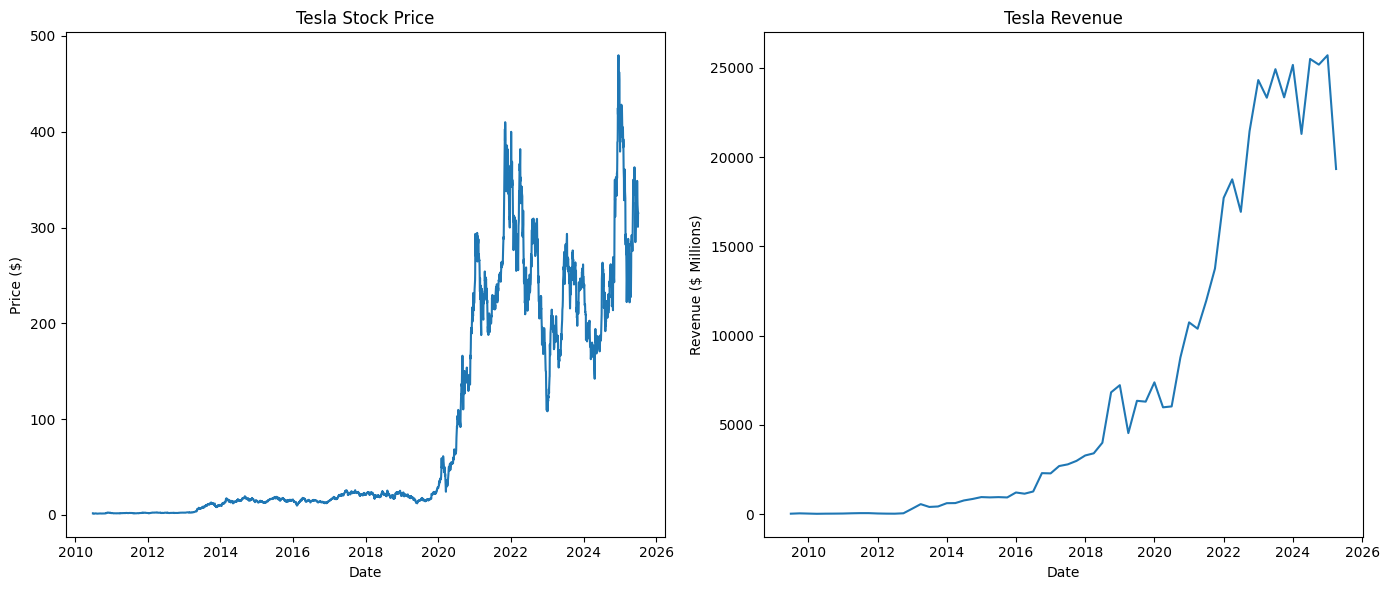

In [15]:
#Tesla Stock and Revenue Dashboard
# Install required packages
!pip install matplotlib yfinance pandas

# Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Function to create stock vs revenue graph
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(14, 6))
    
    # Convert date columns to datetime
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    
    # Plot stock price
    plt.subplot(1, 2, 1)
    plt.plot(stock_data['Date'], stock_data['Close'])
    plt.title(f"{title} Stock Price")
    plt.xlabel("Date")
    plt.ylabel("Price ($)")
    
    # Plot revenue
    plt.subplot(1, 2, 2)
    plt.plot(revenue_data['Date'], pd.to_numeric(revenue_data['Revenue']))
    plt.title(f"{title} Revenue")
    plt.xlabel("Date")
    plt.ylabel("Revenue ($ Millions)")
    
    plt.tight_layout()
    plt.show()

# Example usage with Tesla data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max").reset_index()

# Get revenue data (using your existing scraping code)
# tesla_revenue = ... [your scraping code here]

# Create the graph
make_graph(tesla_data, tesla_revenue, "Tesla")

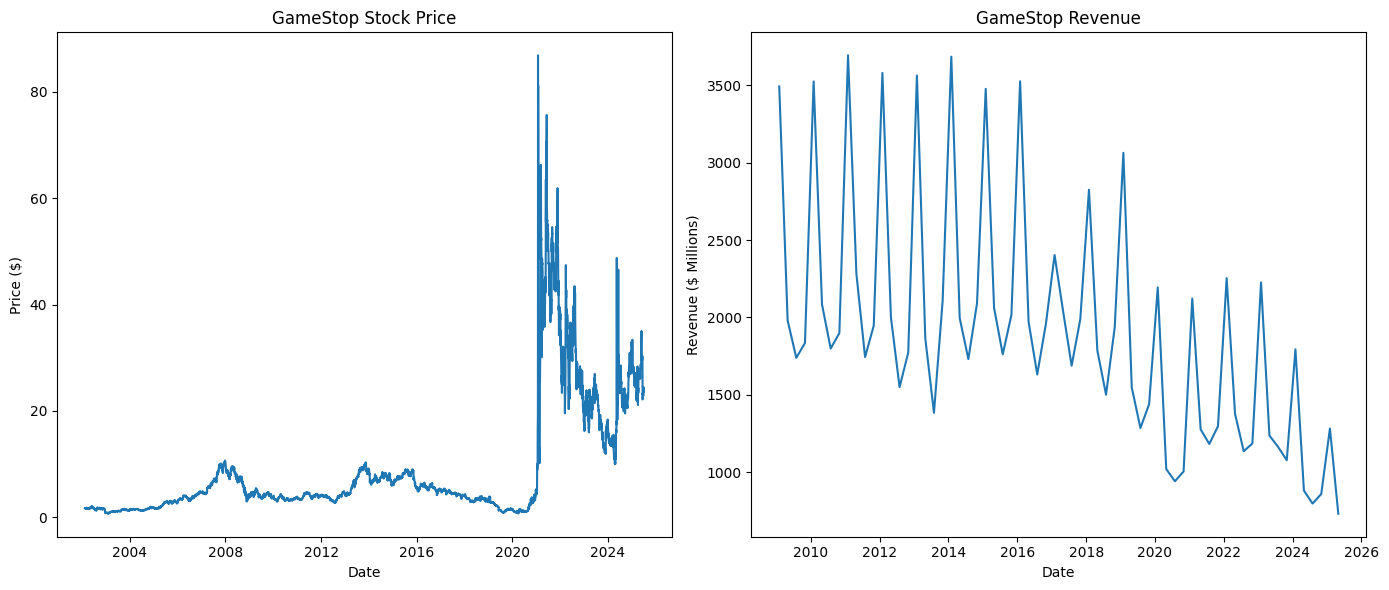

In [16]:
#GameStop Stock and Revenue Dashboard
make_graph(gme_data, gme_revenue, "GameStop")